# Data Cleaning for Text Summarization

Data source:
<br> https://www.kaggle.com/namrarehman/bbc-articles?select=BBCarticles_csv.csv
<br> Code adpated from:
<br> https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python/

In [1]:
# Import modules and packages
import nltk
import string
import numpy as np  
import pandas as pd 
import re
from nltk.corpus import stopwords 
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

## Read in Text

In [2]:
# load data
df = pd.read_csv("BBCarticles.csv", encoding ='latin1') #2127 dataset
df.drop_duplicates(subset=['Text'], inplace=True)
df.dropna(axis=0,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2127 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Summary  2127 non-null   object
 1   Text     2127 non-null   object
dtypes: object(2)
memory usage: 49.9+ KB


In [3]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [4]:
# Clean Text
stop_words = set(stopwords.words('english'))

def clean_text(text, num):
    """
    This function takes a string as input, performs these operations: 
        - lower case, remove unwanted punctuation, apostrophe 's
        - contraction mapping
        - removes any stopwords and short words
        - not enough memory for mdoel to process all numerical features, so removed here
    """ 
    # Lower case
    t1 = text.lower()
    # remove any text inside parentheses
    t1 = re.sub(r'\([^)]*\)', '', t1)
    # remove speechmarks
    t1 = re.sub('"','', t1)
    # contraction mapping
    t1 = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in t1.split(" ")])
    # remove apostrophe 's
    t1 = re.sub(r"'s\b","", t1)
    # remove unwanted punctuation
    t1 = re.sub("[^a-zA-Z]", " ", t1) # keep only alphabets
        #t1 = re.sub("[^0-9A-Fa-f-a-zA-Z]", " ", t1) # keep hexadecimal
        #t1 = re.sub('[(!@"#Â^&*`)]', ' ', t1) # remove specific special tokens
    # Remove stopwords in text
    if(num==0):
        tokens = [w for w in t1.split() if not w in stop_words]
    else:
        tokens = t1.split()
    # Remove short words in summary
    long_words=[]
    for i in tokens:
        if len(i) > 1:
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in df.Text:
    cleaned_text.append(clean_text(t,0))
df['cleaned_text']=cleaned_text

cleaned_summary = []
for t in df.Summary:
    cleaned_summary.append(clean_text(t,0))
df['cleaned_summary']=cleaned_summary

# Review the cleaned dataset
df.head()

,Summary,Text,cleaned_text,cleaned_summary
0,"TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn.For the full-year, TimeWarner posted a profit of $3.36bn, up 27% from its 2003 performance, while revenues grew 6.4% to $42.09b...","Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is ...",ad sales boost time warner profit quarterly profits us media giant timewarner jumped bn three months december year earlier firm one biggest investors google benefited sales high speed internet con...,timewarner said fourth quarter sales rose bn bn full year timewarner posted profit bn performance revenues grew bn quarterly profits us media giant timewarner jumped bn three months december year ...
1,The dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.China's currency remains pegged to the dol...,Dollar gains on Greenspan speech\n\nThe dollar has hit its highest level against the euro in almost three months after the Federal Reserve head said the US trade deficit is set to stabilise.\n\nAn...,dollar gains greenspan speech dollar hit highest level euro almost three months federal reserve head said us trade deficit set stabilise alan greenspan highlighted us government willingness curb s...,dollar hit highest level euro almost three months federal reserve head said us trade deficit set stabilise china currency remains pegged dollar us currency sharp falls recent months therefore made...
2,Yukos' owner Menatep Group says it will ask Rosneft to repay a loan that Yugansk had secured on its assets.State-owned Rosneft bought the Yugansk unit for $9.3bn in a sale forced by Russia to part...,Yukos unit buyer faces loan claim\n\nThe owners of embattled Russian oil giant Yukos are to ask the buyer of its former production unit to pay back a $900m (Â£479m) loan.\n\nState-owned Rosneft bo...,yukos unit buyer faces loan claim owners embattled russian oil giant yukos ask buyer former production unit pay back loan state owned rosneft bought yugansk unit bn sale forced russia part settle ...,yukos owner menatep group says ask rosneft repay loan yugansk secured assets state owned rosneft bought yugansk unit bn sale forced russia part settle bn tax claim yukos sale went ahead december y...
3,"Rod Eddington, BA's chief executive, said the results were ""respectable"" in a third quarter when fuel costs rose by Â£106m or 47.3%.To help offset the increased price of aviation fuel, BA last yea...","High fuel prices hit BA's profits\n\nBritish Airways has blamed high fuel prices for a 40% drop in profits.\n\nReporting its results for the three months to 31 December 2004, the airline made a pr...",high fuel prices hit ba profits british airways blamed high fuel prices drop profits reporting results three months december airline made pre tax profit compared year earlier rod eddington ba chie...,rod eddington ba chief executive said results respectable third quarter fuel costs rose help offset increased price aviation fuel ba last year introduced fuel surcharge passengers ba previously fo...
4,"Pernod has reduced the debt it took on to fund the Seagram purchase to just 1.8bn euros, while Allied has improved the performance of its fast-food chains.Shares in UK drinks and food firm Allied ...",Pernod takeover talk lifts Domecq\n\nShares in UK drinks and food firm Allied Domecq have risen on speculation that it could be the target of a takeover by France's Pernod Ricard.\n\nReports in th...,pernod takeover talk lifts domecq shares uk drinks food firm allied domecq risen speculation could target takeover france pernod ricard reports wall street journal financial times suggested french...,pernod reduced debt took fund seagram purchase bn euros allied improved performance fast food chains shares uk drinks food firm allied 

In [5]:
# Remove duplicates and drop na
df.drop_duplicates(subset=['cleaned_summary'], inplace=True)
df.dropna(axis=0, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Summary          2079 non-null   object
 1   Text             2079 non-null   object
 2   cleaned_text     2079 non-null   object
 3   cleaned_summary  2079 non-null   object
dtypes: object(4)
memory usage: 81.2+ KB


## EDA

Plot the text and summary lengths to gain overview of distribution, then set the 95th percentile length as maximum length for model.

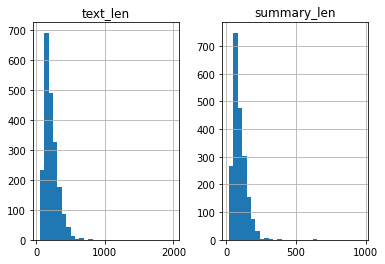

          text_len  summary_len
count  2079.000000  2079.000000
mean    216.301587    98.048100
std     125.235124    60.391278
min      48.000000    20.000000
25%     139.000000    62.000000
50%     188.000000    84.000000
75%     268.000000   121.000000
max    1980.000000   967.000000
{'95th percentile text length: ': 406, '95th percentile summary length: ': 184}


In [6]:
# Plot word length distribution
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

df['text_len'] = text_word_count
df['summary_len'] = summary_word_count
        
df.hist(bins = 30)
plt.show()

print(df.describe())

print({"95th percentile text length: " : int(np.percentile(df.text_len, 95)),
       "95th percentile summary length: " : int(np.percentile(df.summary_len, 95))})

In [17]:
# Set maximum length of inputs to model
max_text_len = 150
max_summary_len = 50

# Select data with lengths less than or equal to specofied max lengths
df_m = df[df.text_len<=max_text_len][df.summary_len<=max_summary_len] 
print(df_m.describe())

         text_len  summary_len
count  244.000000   244.000000
mean   101.418033    41.979508
std     19.259049     6.482295
min     48.000000    20.000000
25%     87.000000    38.750000
50%    100.000000    43.000000
75%    113.250000    47.000000
max    149.000000    50.000000


In [18]:
# Add unique start and end cues to the summary text
df_m['cleaned_summary'] = df_m['cleaned_summary'].apply(lambda x : 'sumhajime '+ x + ' sumowari')

In [19]:
# Check text
df_m.iloc[1,3]

'sumhajime ask jeeves become third leading online search firm week thank revival internet advertising improving fortunes profit quarter dwarfed announced rival google earlier week quarter yahoo earned tipping resurgence online advertising neither ask jeeves doubleclick thrilled investors profit news however ask jeeves among best known names web relatively modest player sumowari'

In [20]:
df_m.head()

,Summary,Text,cleaned_text,cleaned_summary,text_len,summary_len
5,"On an annual basis, the data suggests annual growth of just 0.2%, suggesting a much more hesitant recovery than had previously been thought.A common technical definition of a recession is two succ...","Japan narrowly escapes recession\n\nJapan's economy teetered on the brink of a technical recession in the three months to September, figures show.\n\nRevised figures indicated growth of just 0.1% ...",japan narrowly escapes recession japan economy teetered brink technical recession three months september figures show revised figures indicated growth similar sized contraction previous quarter an...,sumhajime annual basis data suggests annual growth suggesting much hesitant recovery previously thought common technical definition recession two successive quarters negative growth revised figure...,110,41
10,Ask Jeeves has become the third leading online search firm this week to thank a revival in internet advertising for improving fortunes.Its $17m profit for the quarter was dwarfed by the $204m anno...,Ask Jeeves tips online ad revival\n\nAsk Jeeves has become the third leading online search firm this week to thank a revival in internet advertising for improving fortunes.\n\nThe firm's revenue n...,ask jeeves tips online ad revival ask jeeves become third leading online search firm week thank revival internet advertising improving fortunes firm revenue nearly tripled fourth quarter exceeding...,sumhajime ask jeeves become third leading online search firm week thank revival internet advertising improving fortunes profit quarter dwarfed announced rival google earlier week quarter yahoo ear...,105,49
17,"India's rupee has hit a five-year high after Standard & Poor's (S&P) raised the country's foreign currency rating.India's foreign currency rating is now one notch below investment grade, which sta...",India's rupee hits five-year high\n\nIndia's rupee has hit a five-year high after Standard & Poor's (S&P) raised the country's foreign currency rating.\n\nThe rupee climbed to 43.305 per US dollar...,india rupee hits five year high india rupee hit five year high standard poor raised country foreign currency rating rupee climbed per us dollar thursday close currency gained almost past three ses...,sumhajime india rupee hit five year high standard poor raised country foreign currency rating india foreign currency rating one notch investment grade starts bbb rates borrowers creditworthiness l...,101,38
22,"Despite the apparent shortfall in annual economic growth, the good quarterly figures - a so-called ""flash estimate"" - mark a continuing trend of improving indicators for the health of the French e...","Mixed signals from French economy\n\nThe French economy picked up speed at the end of 2004, official figures show - but still looks set to have fallen short of the government's hopes.\n\nAccording...",mixed signals french economy french economy picked speed end official figures show still looks set fallen short government hopes according state statistics body insee growth three months december ...,sumhajime despite apparent shortfall annual economic growth good quarterly figures called flash estimate mark continuing trend improving indicators health french economy also friday france industr...,119,49
27,Crude oil prices surged back above the $47 a barrel mark on Thursday after an energy market watchdog raised its forecasts for global demand.The US Department of Energy reported that crude stockpil...,Strong demand triggers oil rally\n\nCrude oil prices surged back above the $47 a barrel mark on Thursday after an energy market watchdog raised its forecasts for global demand.\n\nThe Internationa...,strong demand triggers oil rally crude oil prices surged back barrel mark thursday energy market watchdog raised forecasts global demand international energy agency warned demand opec crude first ...,sumhajime crude oil prices surged back barrel mark thursday energy market watchdog

In [21]:
df_m.to_csv('data_bbc.csv')  